In [412]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [413]:
data=pd.read_csv('F:\Loan9.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [414]:
data.shape

(614, 13)

In [415]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [416]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [417]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [418]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [419]:
data.corr().T

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


In [420]:
data.apply(lambda x : sum(x.isnull()))

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [421]:
# data.apply(lambda x: sum(x.isnull())) is similar to data.isnull().sum()
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [422]:
data.groupby('Gender')['Loan_Status'].value_counts()

Gender  Loan_Status
Female  Y               75
        N               37
Male    Y              339
        N              150
Name: Loan_Status, dtype: int64

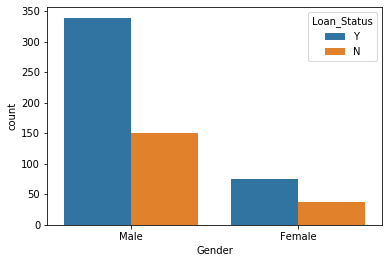

In [423]:
sns.countplot(x='Gender',data=data,hue='Loan_Status')

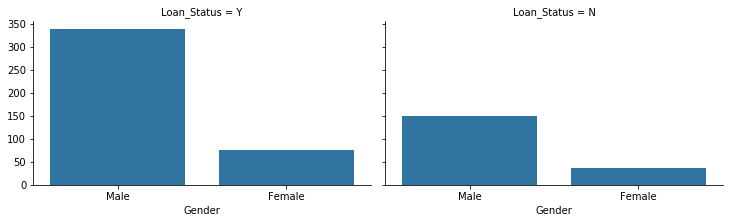

In [424]:
grid=sns.FacetGrid(data,col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot,'Gender')

In [425]:
data.groupby('Married')['Loan_Status'].value_counts()

Married  Loan_Status
No       Y              134
         N               79
Yes      Y              285
         N              113
Name: Loan_Status, dtype: int64

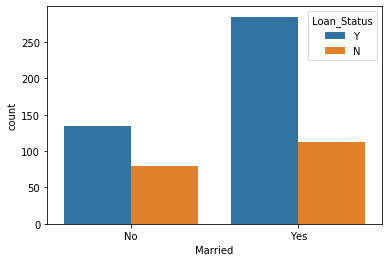

In [426]:
sns.countplot(x='Married',hue='Loan_Status',data=data)

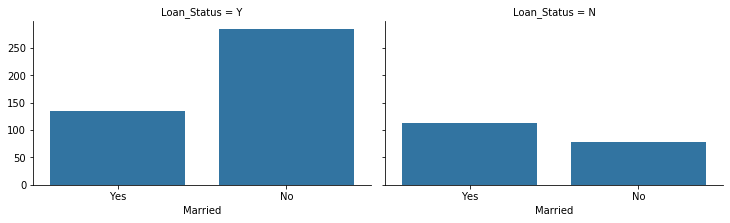

In [427]:
gri=sns.FacetGrid(data,col='Loan_Status', size=3.2, aspect=1.6)
gri.map(sns.countplot,'Married')

In [428]:
data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [429]:
data.groupby('Dependents')['Loan_Status'].value_counts()

Dependents  Loan_Status
0           Y              238
            N              107
1           Y               66
            N               36
2           Y               76
            N               25
3+          Y               33
            N               18
Name: Loan_Status, dtype: int64

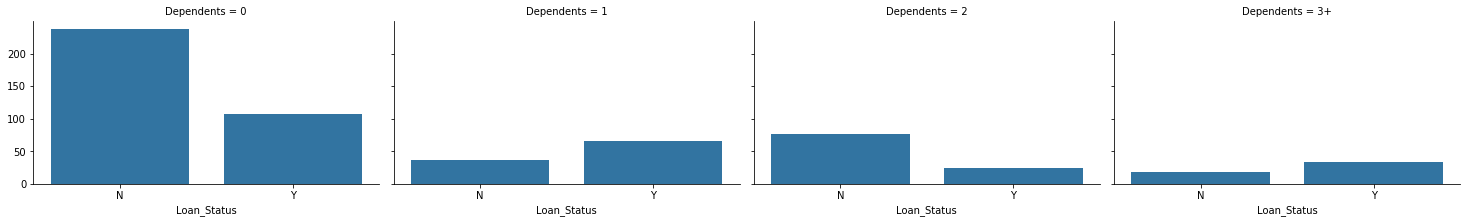

In [430]:
grid=sns.FacetGrid(data,col='Dependents',size=3.2, aspect=1.6)
grid.map(sns.countplot,'Loan_Status')

In [431]:
data['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [432]:
data['Education'].isnull().sum()

0

In [433]:
data.groupby('Education')['Loan_Status'].value_counts()

Education     Loan_Status
Graduate      Y              340
              N              140
Not Graduate  Y               82
              N               52
Name: Loan_Status, dtype: int64

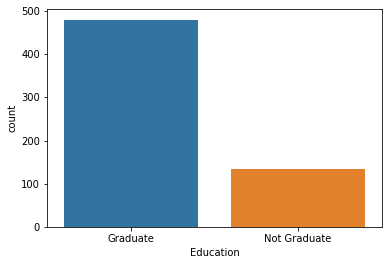

In [434]:
sns.countplot(x='Education',data=data)

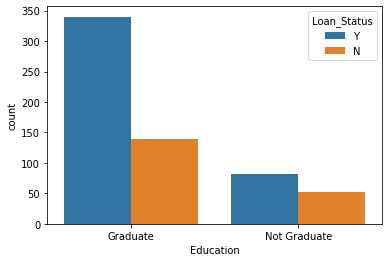

In [435]:
sns.countplot(x='Education',hue='Loan_Status',data=data)

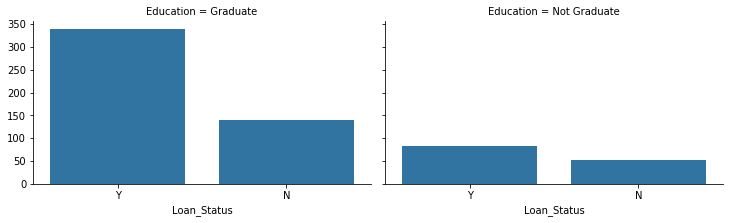

In [436]:
grid=sns.FacetGrid(data,col='Education',size=3.2, aspect=1.6)
grid.map(sns.countplot,'Loan_Status')

In [437]:
data.drop('Loan_ID',axis=1,inplace=True)

In [438]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [439]:
#Slecate the catrogrical data in given data frame 

In [440]:
obj_cols= [*data.select_dtypes('object').columns]
obj_cols.remove('Loan_Status')

In [441]:
obj_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

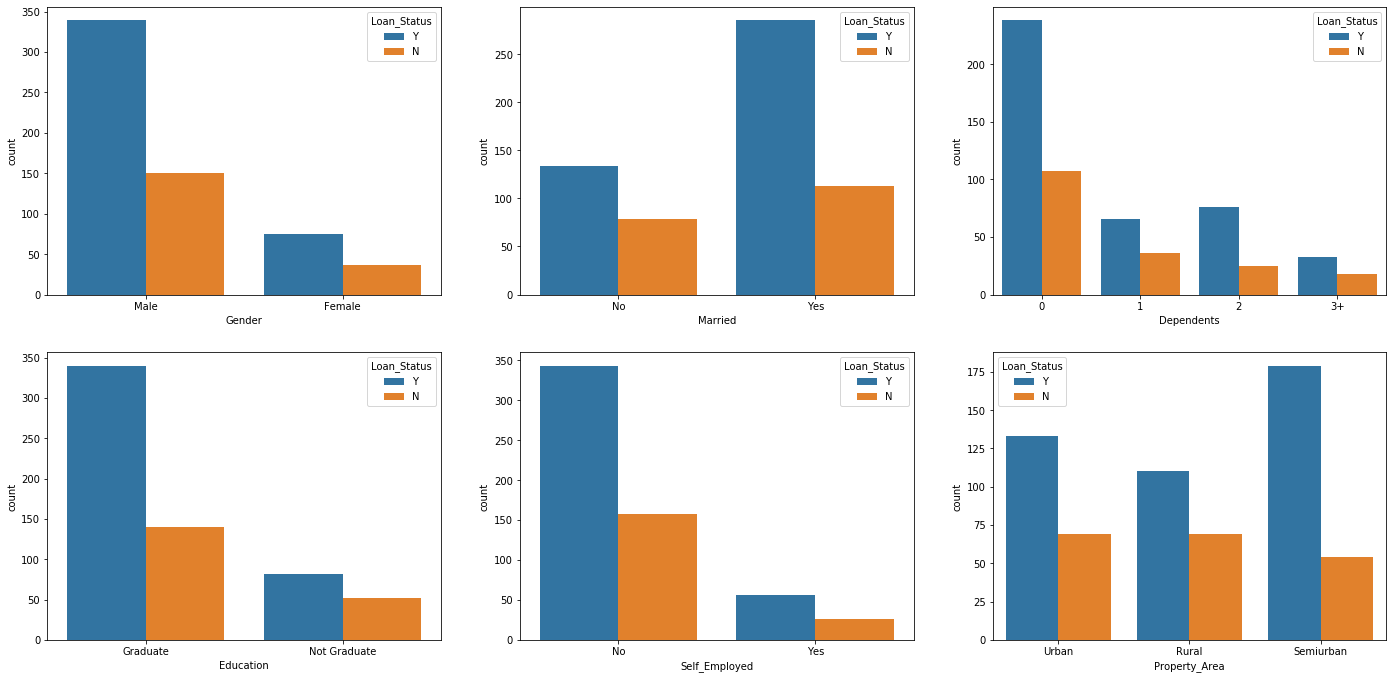

In [442]:
plt.figure(figsize=(24,18))
for idx, cols in enumerate(obj_cols):
    plt.subplot(3, 3, idx+1)
    sns.countplot(cols, data=data, hue='Loan_Status')

In [443]:
cat_list=[]
num_list=[]
for i, c in enumerate(data.dtypes):
    if c=='object':
        cat_list.append(data.iloc[:,i])
    else:
        num_list.append(data.iloc[:,i])

In [444]:
cat_list=pd.DataFrame(cat_list).T

In [445]:
cat_list.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


In [446]:
num_list=pd.DataFrame(num_list).T
num_list.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,NaN,360.0,1.0
1,4583.0,1508.0,128.0,360.0,1.0
2,3000.0,0.0,66.0,360.0,1.0
3,2583.0,2358.0,120.0,360.0,1.0
4,6000.0,0.0,141.0,360.0,1.0


In [447]:
num_list.dtypes

ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
dtype: object

In [448]:
num_list.isnull().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
dtype: int64

In [449]:
num_list.drop('Credit_History',inplace=True,axis=1)

In [450]:
num_list.isnull().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
dtype: int64

In [451]:
num_list.dtypes

ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
dtype: object

In [452]:
#num_list['LoanAmount'].fillna(num_list['LoanAmount'].mean,inplace=True)
#num_list['Loan_Amount_Term'].fillna(num_list['Loan_Amount_Term'].max,inplace=True)

#num_list.fillna(method='bfill', inplace=True)
#num_list.isnull().sum().any()

In [453]:
#num_list['LoanAmount']=num_list.LoanAmount.astype(int)
#df['Loan_Status']= df.Loan_Status.astype(int)

In [454]:
num_list.isnull().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
dtype: int64

In [455]:
num_list.dtypes

ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
dtype: object

In [456]:
cat_list = cat_list.apply(lambda x:x.fillna(x.value_counts().index[0]))
cat_list.isnull().sum().any()

False

In [457]:
cat_list.isnull().sum()

Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

In [458]:
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder()

In [459]:
for i in cat_list:
    cat_list[i]=le.fit_transform(cat_list[i])

In [460]:
cat_list.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,1,0,0,0,0,2,1
1,1,1,1,0,0,0,0
2,1,1,0,0,1,2,1
3,1,1,0,1,0,2,1
4,1,0,0,0,0,2,1


In [461]:
y=cat_list.iloc[:,-1]

In [462]:
cat_list.drop('Loan_Status',inplace=True,axis=1)

In [463]:
print(cat_list.shape)
print(num_list.shape)
print(cat_list.dtypes)
print(num_list.dtypes)

(614, 6)
(614, 4)
Gender           int32
Married          int32
Dependents       int32
Education        int32
Self_Employed    int32
Property_Area    int32
dtype: object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
dtype: object


In [485]:
data1=pd.concat([cat_list,num_list],axis=1)
data1.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,1,0,0,0,0,2,5849.0,0.0,NaN,360.0
1,1,1,1,0,0,0,4583.0,1508.0,128.0,360.0
2,1,1,0,0,1,2,3000.0,0.0,66.0,360.0
3,1,1,0,1,0,2,2583.0,2358.0,120.0,360.0
4,1,0,0,0,0,2,6000.0,0.0,141.0,360.0


In [486]:
X=data1.iloc[:,:]

In [488]:
x_train,x_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=123)

In [489]:
logit= LogisticRegressionCV()
logit.fit(X_train, y_train)

logit_pred= logit.predict(X_test)

print(accuracy_score(y_test, logit_pred))

confusion_matrix(y_test, logit_pred)


0.6422764227642277


C:\Users\ravi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


array([[ 0, 42],
       [ 2, 79]], dtype=int64)

In [466]:
data.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y


In [467]:
data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [468]:
data.drop('Loan_Status',inplace=True,axis=1)


In [471]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [474]:
dummies= pd.get_dummies(data, drop_first=True)

In [475]:
from sklearn.impute import SimpleImputer

In [476]:
SimImp = SimpleImputer()

train= pd.DataFrame(SimImp.fit_transform(dummies), columns=dummies.columns)

In [477]:
train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849.0,0.0,146.412162,360.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,4583.0,1508.0,128.000000,360.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3000.0,0.0,66.000000,360.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,2583.0,2358.0,120.000000,360.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,6000.0,0.0,141.000000,360.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [478]:
X=train.iloc[:,:]

In [479]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=123, stratify= y)

In [483]:
logit= LogisticRegressionCV()
logit.fit(X_train, y_train)

logit_pred= logit.predict(X_test)

print(accuracy_score(y_test, logit_pred))

confusion_matrix(y_test, logit_pred)


C:\Users\ravi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.7967479674796748


array([[13, 25],
       [ 0, 85]], dtype=int64)